# **Assignment 1 : Notebook 5**

# **Dataset: Light Rail Patronage**

# **Predictive model :**
# **ARIMA alias AutoRegressive Integrated Moving Average**
# **SARIMA alias Seasonal ARIMA**

ARIMA and SARIMA are both powerful statistical models used for time series forecasting. They analyze and predict future values based on past observations, but they differ in their ability to handle trends and seasonality.


ARIMA (Autoregressive Integrated Moving Average):

**Autoregressive (AR):** Takes into account the influence of past values on the current value.

**Integrated (I):** Applies differencing to make the data stationary (mean and variance constant over time).

**Moving Average (MA):** Considers the average of past error terms to account for random fluctuations.

# **ARIMA**

Focuses on non-seasonal trends and patterns in the data.

Uses past values of the time series and past errors to predict future values.

Represented by the notation ARIMA(p, d, q):

**p:** The number of autoregressive terms (past values influencing current value).

**d:** The degree of differencing (transforming data to make it stationary).

**q:** The number of moving average terms (past errors influencing current value).

# **SARIMA (Seasonal ARIMA):**

An extension of ARIMA that incorporates seasonality (recurring patterns at specific intervals).

Represented by the notation SARIMA(p, d, q)(P, D, Q, m):

**(p, d, q)**: Same as ARIMA for non-seasonal components.

**(P, D, Q):** Similar terms for seasonal components (capital letters).

**m:** The seasonality period (e.g., 7 for weekly data, 12 for monthly data).

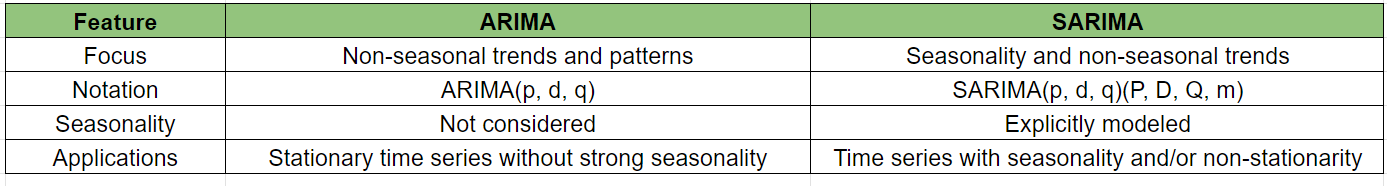

**Choosing between ARIMA and SARIMA:**

**Use ARIMA:** If your data doesn't show any obvious trends or seasonality.
**Use SARIMA: **If your data has significant trends or seasonal patterns.

**Applications of ARIMA and SARIMA:**

Forecasting sales, demand, prices, economic indicators, etc.

Modeling and predicting environmental phenomena like temperature, rainfall, etc.

Analyzing and forecasting financial data like stock prices, exchange rates, etc.


**Benefits of ARIMA and SARIMA:**

Relatively simple and easy to understand.

Effective for a wide range of time series data.

Can be easily implemented in various statistical software packages.


**Limitations of ARIMA and SARIMA:**

Not suitable for highly non-linear data or complex relationships.

Requires stationary data, which may need transformation or differencing.

Model selection and parameter estimation can be challenging.


# **Install the pre-defined arima package**

# **Install the pre-defined arima package**

In [1]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.2 MB/s eta 0:00:00


In [2]:
#importing necesery libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import pmdarima as pm

# **Reading the time series input data**

In [3]:
data=pd.read_csv("/content/Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1575 non-null   object
 1   myway         1575 non-null   int64 
 2   paper_ticket  1575 non-null   int64 
 3   total         1575 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 49.3+ KB


In [4]:
#formatting the date column
df = data
df.date = pd.to_datetime(df.date,dayfirst=True)

Checking the stationarity of myway and paper_ticket data

# **Hypothesis testing**

While hypothesis testing isn't strictly necessary before every time series forecasting task, it can play a crucial role in several crucial steps, making it a valuable practice in many cases. Here's why:

**1. Understanding Data Characteristics:**

Stationarity Test: Hypothesis testing helps us check for stationarity, a key requirement for many forecasting models. It allows us to reject the null hypothesis of non-stationarity and ensure the data's statistical properties remain constant over time, improving model accuracy.
Trends and Seasonality: Testing for trends and seasonality through hypothesis testing lets us confirm their presence and guide us in choosing appropriate forecasting methods or transformations.

**2. Model Selection and Improvement:**

Feature Selection: Identifying statistically significant features through tests helps eliminate irrelevant ones, reducing model complexity and improving its interpretability and accuracy.
Model Parameterization: Testing different model parameters and comparing their performance against null hypotheses allows us to select the optimal configurations for our forecasts.

**3. Evaluating Forecast Validity:**

Confidence Intervals: Hypothesis testing informs the construction of confidence intervals around forecasts, quantifying the uncertainty associated with our predictions. This transparency is crucial for decision-making based on the forecasts.
Model Comparison: Testing the null hypothesis that two forecasting models perform equally well helps us objectively compare different options and select the most reliable one.


**4. Avoiding Pitfalls:**

Identifying Spurious Relationships: Tests can help us avoid being misled by chance correlations or random patterns in the data, improving the overall quality and reliability of our forecasts.
Overfitting: Testing different model complexities against null hypotheses prevents overfitting, where the model memorizes the specific data instead of capturing generalizable patterns for future prediction.

# **Hypothesis building for stationarity**


In time series analysis, the distinction between stationary and non-stationary data is crucial! It all boils down to the stability of statistical properties over time.

**Stationary time series behave like well-mannered guests at a party. They maintain a consistent character throughout, meaning:**

**Mean and variance remain constant:** No upward or downward trends, and the spread of data points stays the same. Imagine a plate of cookies where the average size and the variation in sizes stay roughly the same over time.

**Autocorrelation fades over time:** The dependence of a data point on its past values weakens as you go further back. Think of conversations at the party; references to what someone said five minutes ago are less likely than to what they just said.

**Non-stationary time series are vice-versa.Their statistical properties fluctuate, making them trickier to analyze and model:**



**Trending mean or variance:** bold textThe data exhibits a clear upward or downward drift, or its spread changes over time. Picture a stack of cookies gradually growing or shrinking throughout the party.

**Persistent autocorrelation:** The influence of past values lingers, meaning distant data points can still significantly impact current ones. Imagine party gossip spreading long after the initial source, influencing conversations throughout the night.
Here's a table summarizing the key differences:

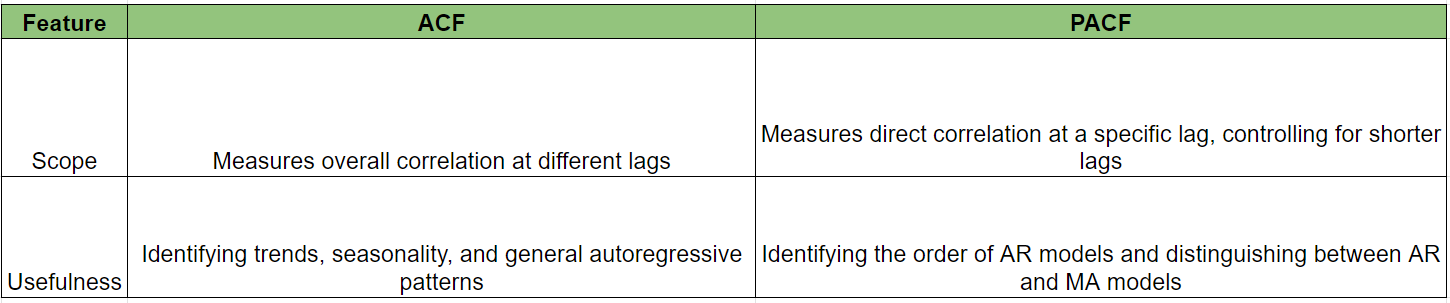

# **Why does Stationarity matters?**

Stationarity is important for several reasons:

**Reliable analysis:** Stationary data allows for the use of simpler and more reliable statistical methods for analysis and forecasting. Non-stationary data can lead to misleading results.

**Model stability:** Models built on stationary data are more likely to be stable and accurate over time. Non-stationary data can lead to models that quickly become outdated.

**Easier interpretation:** Stationary data is easier to interpret and understand, as its patterns and relationships are consistent. Non-stationary data can be more complex and challenging to decipher.
So, how do you handle non-stationary data?

There are ways to transform non-stationary data into stationary form. Common techniques include:

**Differencing:** This involves taking the difference between consecutive data points, often removing trends and seasonality. Think of it as calculating the change in cookie stack size between each observation.

**Logarithmic transformation:** This can stabilize the variance of non-stationary data, making it more predictable. Imagine plotting cookie sizes on a logarithmic scale to compress the spread.

ADF Test on myway Time Series:
ADF Statistic: -3.5495706398463036
p-value: 0.0068016280839756915
Critical Values: {'1%': -3.4345677345088688, '5%': -2.8634028737525887, '10%': -2.5677617635268795}
Is the time series stationary? True


ADF Test on paper_ticket Time Series:
ADF Statistic: -3.432579785840505
p-value: 0.009897117545042695
Critical Values: {'1%': -3.4345677345088688, '5%': -2.8634028737525887, '10%': -2.5677617635268795}
Is the time series stationary? True




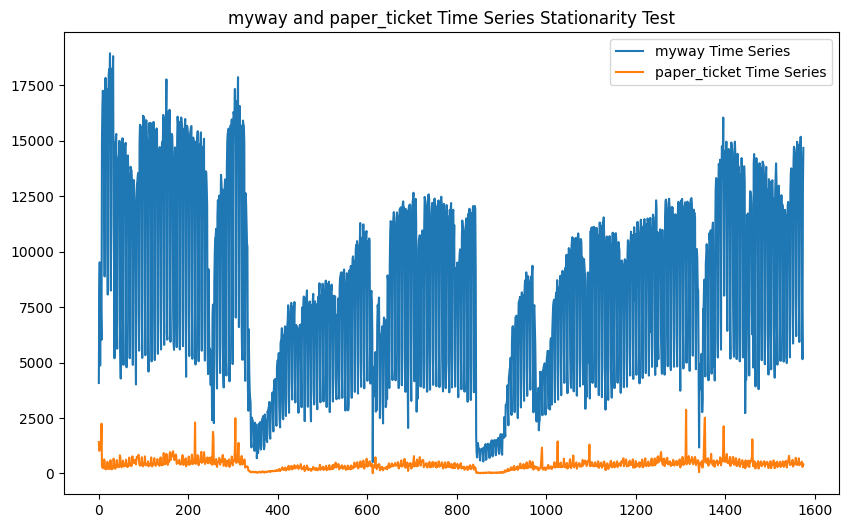

In [5]:
# Sample time series data (you should replace this with your actual data)
myway_dataframe = list(df.myway)
paperticket_dataframe = list(df.paper_ticket)

# Convert data to a pandas Series
time_series_input1 = pd.Series(myway_dataframe)
time_series_input2 = pd.Series(paperticket_dataframe)

# Define a function to perform ADF test and print results
def aug_dickey_fuller_test(time_series):
    result = adfuller(time_series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    print("Is the time series stationary?", result[1] <= 0.05)

# Perform ADF test on the myway time series
print("ADF Test on myway Time Series:")
aug_dickey_fuller_test(time_series_input1)
print("\n")

# Perform ADF test on the paper_ticket time series
print("ADF Test on paper_ticket Time Series:")
aug_dickey_fuller_test(time_series_input2)
print("\n")

# Plot the myway and paper_ticket time series
plt.figure(figsize=(10, 6))
plt.plot(time_series_input1, label='myway Time Series')
plt.plot(time_series_input2, label='paper_ticket Time Series')
plt.legend()
plt.title('myway and paper_ticket Time Series Stationarity Test')
plt.show()

# **How ADF tests ensures Stationarity ?**

**ADF Test and Unit Roots:**

The ADF test detects the presence of unit roots in a time series. A unit root is a characteristic that makes a time series non-stationary, often indicating a long-term trend or persistent shocks.

The test involves estimating a regression equation and testing the significance of a particular coefficient (the "unit root coefficient").
How the Test Works:

**Null Hypothesis:** The time series has a unit root (it's non-stationary).

**Alternative Hypothesis:** The time series does not have a unit root (it's stationary).

**Test Statistic:** The ADF test calculates a test statistic (usually a t-statistic or an F-statistic) based on the estimated regression model.
P-value: The P-value is compared to a significance level (usually 0.05).
Interpreting Results:

**Low P-value (less than significance level):** Reject the null hypothesis, indicating stationarity.

**High P-value (greater than significance level):**  Fail to reject the null hypothesis, suggesting non-stationarity.


**Key Points:**

1. The ADF test is specifically designed to test for unit roots, a common cause of non-stationarity.

2. It's a statistical test, so it involves hypothesis testing and P-values.


3. It's often used in conjunction with other tests and visual inspection of time series plots.

# **Finding the best parameters for ARIMA using parameter tuning technique**

In [6]:

start_date = '2022-05-31'
filtered_dataframe1 = df[df.date>start_date]
data = list(filtered_dataframe1.myway)

# Convert data to a pandas Series
time_series = pd.Series(data)

# Find best ARIMA order using AIC
myway_best_arima = pm.auto_arima(time_series, seasonal=True, stepwise=True, trace=True).order

# Sample time series data (replace this with your own data)
data = list(df.paper_ticket[df.date>='2022-01-01'])

# Convert data to a pandas Series
time_series = pd.Series(data)

# Find best ARIMA order using AIC
paperticket_best_arima = pm.auto_arima(time_series, seasonal=False, stepwise=True, trace=True).order

print("Best ARIMA Order myway:", myway_best_arima)

print("Best ARIMA Order paper_ticket:", paperticket_best_arima)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8182.472, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8438.447, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8440.425, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8440.373, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8436.452, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8227.748, Time=0.81 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8297.704, Time=1.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8239.621, Time=1.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8245.706, Time=0.80 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8077.875, Time=4.75 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=7986.728, Time=3.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=7990.3

# **The need of best orders in ARIMA**

# **Model Fit and Accuracy:**

The parameters of an ARIMA model (p, d, q) determine its structure and how it captures the underlying patterns in the time series data.

Incorrect parameters can lead to:

Poor model fit, meaning the model doesn't accurately represent the data's behavior.

Inaccurate forecasts, as the model's predictions won't align with the true patterns.


# **Understanding Relationships:**

The parameters reveal crucial information about the time series:

**p:** The number of autoregressive (AR) terms, indicating how much past values influence the current value.

**d:** The degree of differencing needed to make the series stationary.

**q:** The number of moving average (MA) terms, capturing short-term shocks or random fluctuations.

Understanding these relationships is essential for interpreting model results and making informed decisions.
Optimizing Performance:

**Finding the best parameters often involves:**

Examining autocorrelation and partial autocorrelation plots.

Using information criteria like AIC or BIC to compare different model configurations.

Employing grid search or automated model selection techniques.

This optimization process ensures the model extracts the most relevant information from the data, leading to better forecasts and insights.


# **Fitting the best parameters for ARIMA model - "My Way" variable**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                               myway   No. Observations:                  411
Model:             SARIMAX(5, 0, 2)x(1, 1, [], 52)   Log Likelihood               -2874.449
Date:                             Sun, 14 Jan 2024   AIC                           5766.897
Time:                                     06:51:31   BIC                           5800.291
Sample:                                          0   HQIC                          5780.259
                                             - 411                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2333      0.193      6.377      0.000       0.854       1.612
ar.L2         -0.6598      

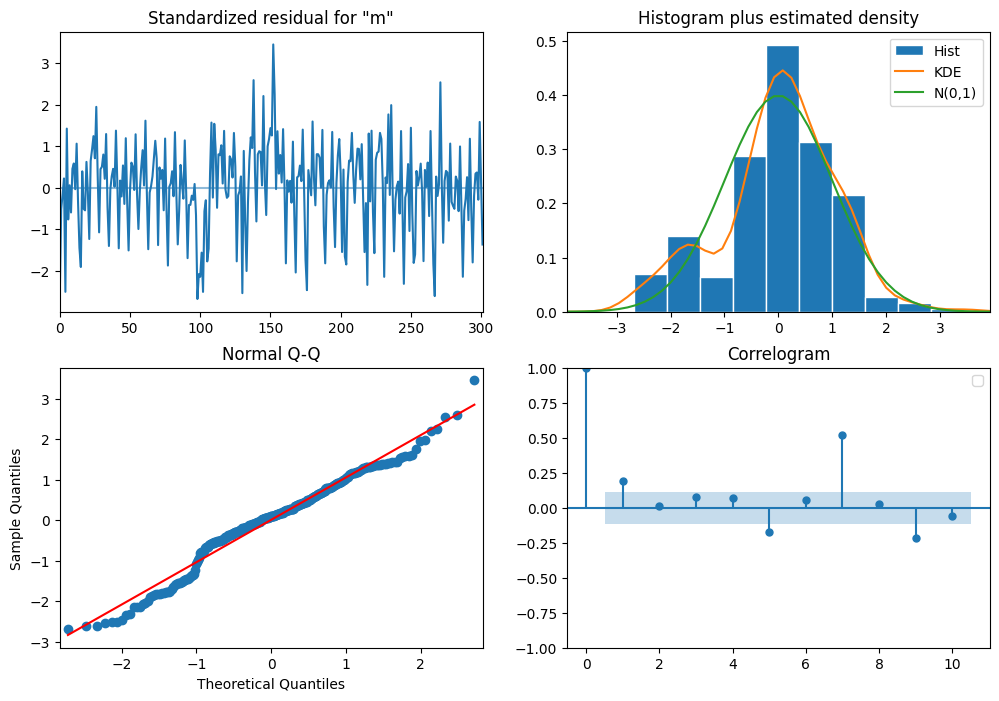

In [7]:
#training set
end_date = "2023-07-16"
filtered_dataframe2=filtered_dataframe1[filtered_dataframe1.date<=end_date]

order = (5, 0, 2)  # Non-seasonal (p, d, q) order
seasonal_order = (1, 1, 0, 52)  # Seasonal (P, D, Q, s) order


model = sm.tsa.SARIMAX(filtered_dataframe2['myway'], order=order, seasonal_order=seasonal_order,enforce_stationarity=False)
results = model.fit()


print(results.summary())
results.plot_diagnostics(figsize=(12, 8))
plt.legend()
plt.show()


# **Generating the forecast for "My Way" variable with 30 days duration**

In [8]:
steps_to_forecast_future = 30  # Number of steps to forecast
forecast = results.get_forecast(steps=steps_to_forecast_future)
mean_values_forecasted = forecast.predicted_mean
confidence_interval = forecast.conf_int()
confidence_interval

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,lower myway,upper myway
411,5406.826986,17709.204549
412,4954.300391,17378.479945
413,4264.393390,16953.607810
414,-2648.247133,10111.330497
415,1082.802862,13858.277400
416,-737.991822,12191.809071
417,-198.704348,13112.182219
418,4585.861345,18044.720524
419,2093.504744,15566.556700
420,1759.896438,15233.326403


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['lower myway'].plot(kind='hist', bins=20, title='lower myway')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['upper myway'].plot(kind='hist', bins=20, title='upper myway')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='lower myway', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='lower myway', y='upper myway', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['lower myway']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('lower myway')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['upper myway']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('upper myway')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['lower myway'].plot(kind='line', figsize=(8, 4), title='lower myway')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['upper myway'].plot(kind='line', figsize=(8, 4), title='upper myway')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Evaluating the performance of the model for "My Way" forecast with 30 days duration**

In [9]:
actuals =list(filtered_dataframe1.myway[filtered_dataframe1.date>'2023-07-16'])
mean_values_forecasted=list(mean_values_forecasted)
#storing the predctions in a list
list_of_predictions_30days_myway = mean_values_forecasted

print('RMSE value is:', sqrt(mean_squared_error(actuals, mean_values_forecasted)))
print('MAE value is:', (mean_absolute_error(actuals, mean_values_forecasted)))
print('MAPE value is:', (mean_absolute_percentage_error(actuals, mean_values_forecasted)))
print('MSE value is:', (mean_squared_error(actuals, mean_values_forecasted)))

RMSE value is: 4639.115066248306
MAE value is: 3962.9315938828854
MAPE value is: 0.3516638206310155
MSE value is: 21521388.597892027


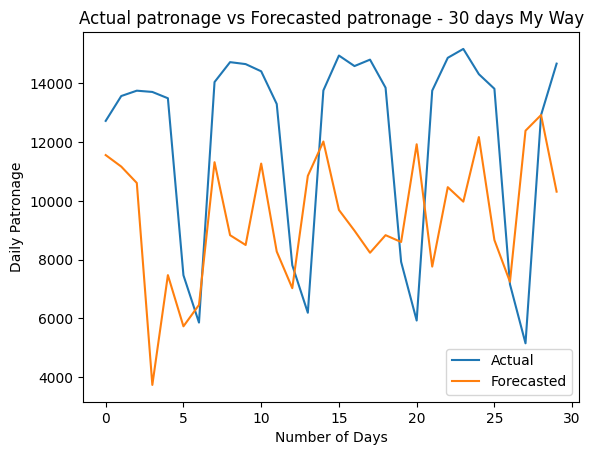

In [10]:
x = list(range(0,30))
plt.plot(x, actuals, label='Actual')
plt.plot(x, mean_values_forecasted, label='Forecasted')
plt.xlabel("Number of Days")
plt.ylabel("Daily Patronage")
plt.title("Actual patronage vs Forecasted patronage - 30 days My Way")
plt.legend()
plt.show()

# **Fitting the best parameters for ARIMA model - "Paper Ticket" variable**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           paper_ticket   No. Observations:                  562
Model:               SARIMAX(7, 0, 5)   Log Likelihood               -3709.778
Date:                Sun, 14 Jan 2024   AIC                           7445.557
Time:                        06:51:35   BIC                           7501.704
Sample:                             0   HQIC                          7467.489
                                - 562                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0787      0.293      0.269      0.788      -0.496       0.653
ar.L2          0.2035      0.136      1.498      0.134      -0.063       0.470
ar.L3          0.3177      0.123      2.578      0.0

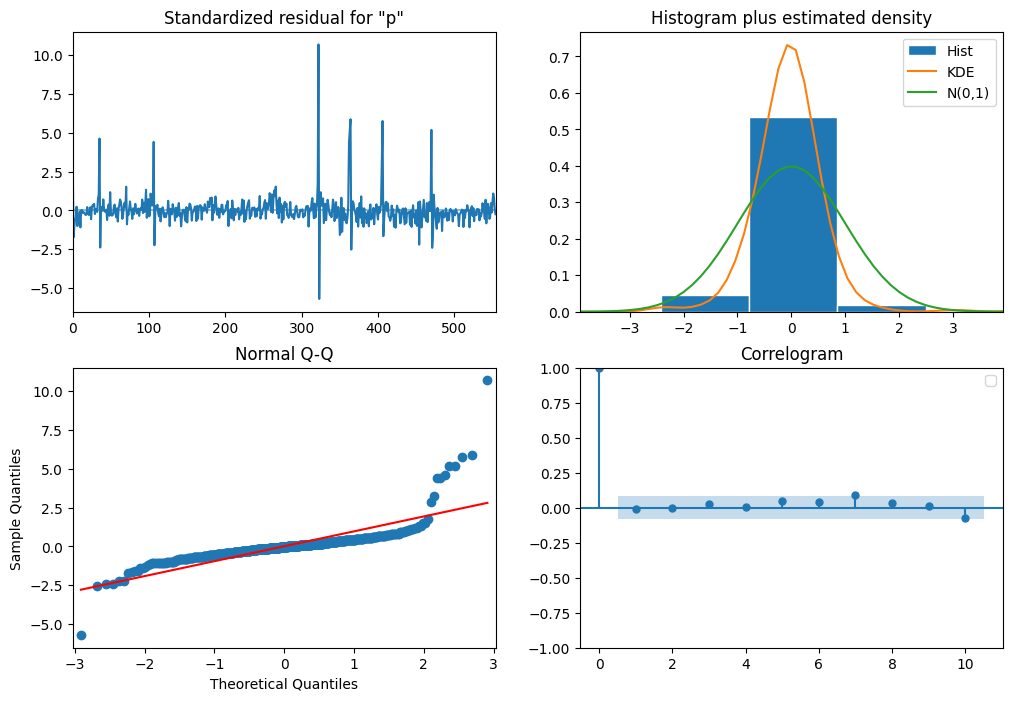

In [11]:
#training set
filtered_dataframe3=df[df.date>='2022-01-01']
filtered_dataframe2=filtered_dataframe3[filtered_dataframe3.date<='2023-07-16']

order = (7, 0, 5)  # Non-seasonal (p, d, q) order
seasonal_order = (0, 1, 0, 52)  # Seasonal (P, D, Q, s) order


model = sm.tsa.SARIMAX(filtered_dataframe2['paper_ticket'], order=order,enforce_stationarity=False)
results = model.fit()


print(results.summary())
results.plot_diagnostics(figsize=(12, 8))
plt.legend()
plt.show()



# **Generating the forecast for "Paper Ticket" variable with 30 days duration**

In [12]:
steps_to_forecast_future = 30  # Number of steps to forecast
forecast = results.get_forecast(steps=steps_to_forecast_future)
mean_values_forecasted = forecast.predicted_mean
confidence_interval = forecast.conf_int()
confidence_interval

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,lower paper_ticket,upper paper_ticket
562,8.178723,792.834080
563,38.277593,907.860334
564,-31.104569,861.775213
565,-32.792928,860.098534
566,70.755051,964.197279
567,55.618971,950.246365
568,-38.227701,856.708198
569,16.059576,912.041444
570,74.162794,971.233720
571,-8.256254,889.235559


from matplotlib import pyplot as plt
_df_11['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['lower paper_ticket'].plot(kind='hist', bins=20, title='lower paper_ticket')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['upper paper_ticket'].plot(kind='hist', bins=20, title='upper paper_ticket')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='index', y='lower paper_ticket', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='lower paper_ticket', y='upper paper_ticket', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['lower paper_ticket']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('lower paper_ticket')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['upper paper_ticket']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('upper paper_ticket')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_19['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['lower paper_ticket'].plot(kind='line', figsize=(8, 4), title='lower paper_ticket')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['upper paper_ticket'].plot(kind='line', figsize=(8, 4), title='upper paper_ticket')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Evaluating the performance of the model for "Paper Ticket" forecast with 30 days duration**

In [13]:
actuals =list(filtered_dataframe1.paper_ticket[filtered_dataframe1.date>'2023-07-16'])
mean_values_forecasted=list(mean_values_forecasted)


print('RMSE value is:', sqrt(mean_squared_error(actuals, mean_values_forecasted)))
print('MAE value is:', (mean_absolute_error(actuals, mean_values_forecasted)))
print('MAPE value is:', (mean_absolute_percentage_error(actuals, mean_values_forecasted)))
print('MSE value is:', (mean_squared_error(actuals, mean_values_forecasted)))

RMSE value is: 84.12032317825073
MAE value is: 65.55676019773212
MAPE value is: 0.1469227569373823
MSE value is: 7076.228771613348


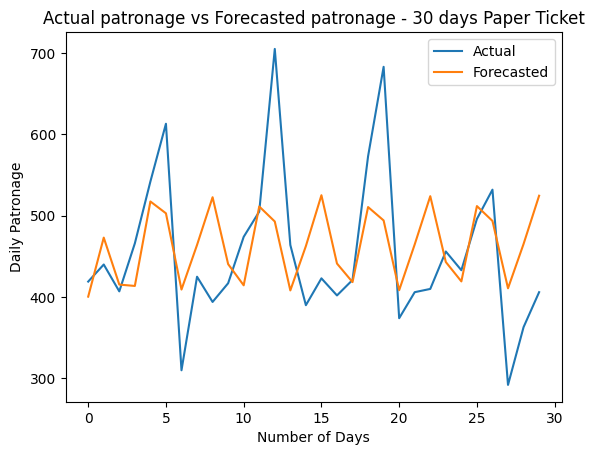

In [14]:
x = list(range(0,30))
plt.plot(x, actuals, label='Actual')
plt.plot(x, mean_values_forecasted, label='Forecasted')
plt.xlabel("Number of Days")
plt.ylabel("Daily Patronage")
plt.title('Actual patronage vs Forecasted patronage - 30 days Paper Ticket')
plt.legend()
plt.show()

# **Adding the Forecast for "My Way" and "Paper ticket" together for the "Total" forecast**

In [15]:
#storing the predctions in a list
predictions_30_paper_ticket=mean_values_forecasted

#getting the total ticket value by summing myway and paper_ticket
predictions_30=[]
for i in range (0,30):
    predictions_30.append(predictions_30_paper_ticket[i]+list_of_predictions_30days_myway[i])

# **Evaluating the performance of the model for "Total" forecast with 30 days duration**

In [16]:
actuals =list(filtered_dataframe1.total[filtered_dataframe1.date>'2023-07-16'])
mean_values_forecasted=predictions_30


print('RMSE value is:', sqrt(mean_squared_error(actuals, mean_values_forecasted)))
print('MAE value is:', (mean_absolute_error(actuals, mean_values_forecasted)))
print('MAPE value is:', (mean_absolute_percentage_error(actuals, mean_values_forecasted)))
print('MSE value is:', (mean_squared_error(actuals, mean_values_forecasted)))

RMSE value is: 4632.077798486128
MAE value is: 3958.9401300480986
MAPE value is: 0.3377559963634538
MSE value is: 21456144.731228095


In [17]:
#P10, P50 and P90 predictions and the error in the prediction

Forecasted_Percentile10 = np.percentile(predictions_30,10)
Actual_Percentile10 = np.percentile(actuals,10)
print('P10 Error % :',mean_absolute_percentage_error([Forecasted_Percentile10], [Actual_Percentile10]))

Forecasted_Percentile50 = np.percentile(predictions_30,50)
Actual_Percentile50 = np.percentile(actuals,50)
print('P50 Error % :',mean_absolute_percentage_error([Forecasted_Percentile50], [Actual_Percentile50]))

Forecasted_Percentile90 = np.percentile(predictions_30,90)
Actual_Percentile90 = np.percentile(actuals,90)
print('P90 Error % :',mean_absolute_percentage_error([Forecasted_Percentile90], [Actual_Percentile90]))

P10 Error % : 0.11215507212626052
P50 Error % : 0.44174318107114025
P90 Error % : 0.21937230019035275


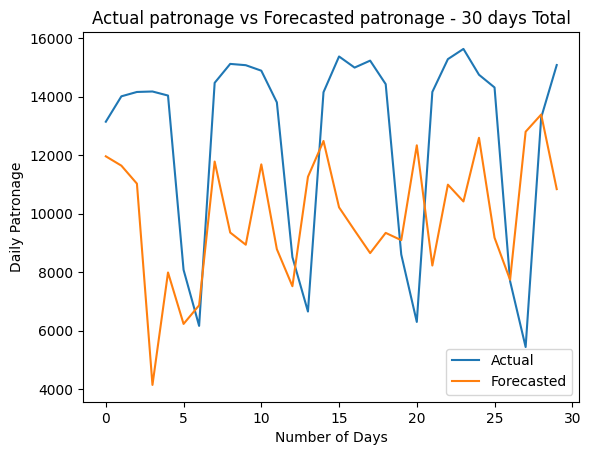

In [18]:
x = list(range(0,30))
plt.plot(x, actuals, label='Actual')
plt.plot(x, mean_values_forecasted, label='Forecasted')
plt.xlabel("Number of Days")
plt.ylabel("Daily Patronage")
plt.title('Actual patronage vs Forecasted patronage - 30 days Total')
plt.legend()
plt.show()

# **Generating the forecast for "My Way" variable with 14 days duration**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                               myway   No. Observations:                  427
Model:             SARIMAX(5, 0, 2)x(1, 1, [], 52)   Log Likelihood               -3049.618
Date:                             Sun, 14 Jan 2024   AIC                           6117.236
Time:                                     06:53:27   BIC                           6151.094
Sample:                                          0   HQIC                          6130.759
                                             - 427                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3059      1.764     -0.173      0.862      -3.763       3.151
ar.L2          0.1418      

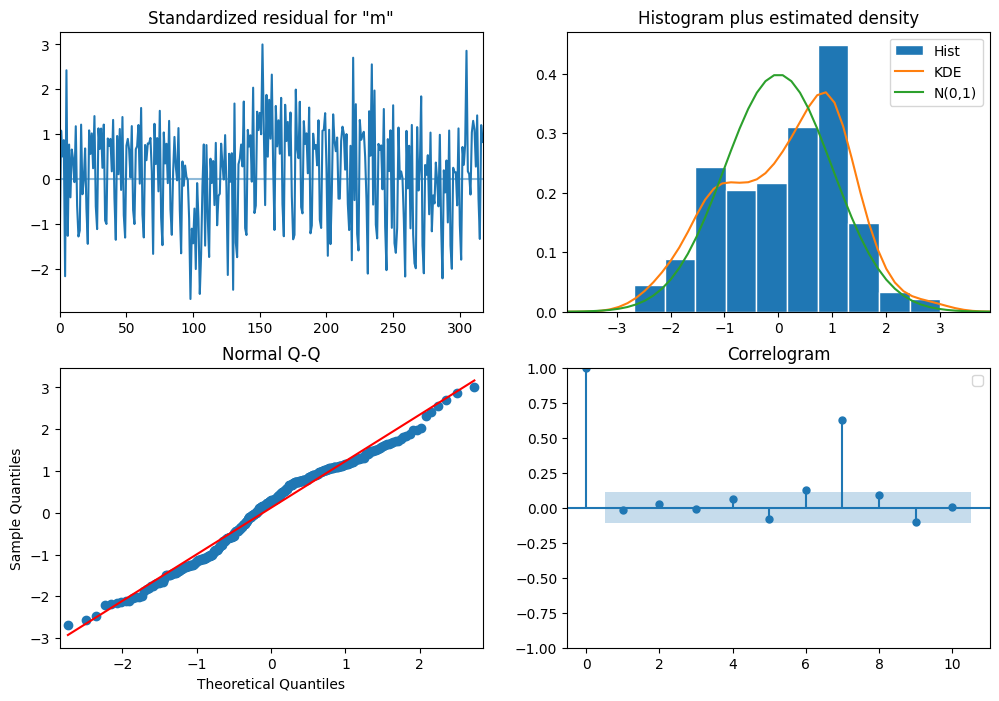

In [19]:
#training set
filtered_dataframe2=filtered_dataframe1[filtered_dataframe1.date<='2023-08-01']

order = (5, 0, 2)  # Non-seasonal (p, d, q) order
seasonal_order = (1, 1, 0, 52)  # Seasonal (P, D, Q, s) order


model = sm.tsa.SARIMAX(filtered_dataframe2['myway'], order=order, seasonal_order=seasonal_order,enforce_stationarity=False)
results = model.fit()


print(results.summary())
results.plot_diagnostics(figsize=(12, 8))
plt.legend()
plt.show()

In [20]:
steps_to_forecast_future = 14  # Number of steps to forecast
forecast = results.get_forecast(steps=steps_to_forecast_future)
mean_values_forecasted = forecast.predicted_mean
confidence_interval = forecast.conf_int()
confidence_interval

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,lower myway,upper myway
427,5383.769780,17572.673521
428,2636.822790,16354.151853
429,2160.315930,15879.958339
430,1586.007711,15319.684332
431,5204.474394,18956.515912
432,679.457415,14441.311949
433,4615.751245,18379.062499
434,4306.224100,18069.870934
435,5930.059589,19693.783649
436,1789.565450,15553.447453


from matplotlib import pyplot as plt
_df_22['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['lower myway'].plot(kind='hist', bins=20, title='lower myway')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['upper myway'].plot(kind='hist', bins=20, title='upper myway')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='index', y='lower myway', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='lower myway', y='upper myway', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['lower myway']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('lower myway')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['upper myway']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('upper myway')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_30['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['lower myway'].plot(kind='line', figsize=(8, 4), title='lower myway')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['upper myway'].plot(kind='line', figsize=(8, 4), title='upper myway')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Evaluating the performance of the model for "My Way" forecast with 14 days duration**

In [21]:
actuals =list(filtered_dataframe1.myway[filtered_dataframe1.date>'2023-08-01'])
mean_values_forecasted=list(mean_values_forecasted)
#storing the predctions in a list
list_of_predictions_14days_myway= mean_values_forecasted

print('RMSE value is:', sqrt(mean_squared_error(actuals, mean_values_forecasted)))
print('MAE value is:', (mean_absolute_error(actuals, mean_values_forecasted)))
print('MAPE value is:', (mean_absolute_percentage_error(actuals, mean_values_forecasted)))
print('MSE value is:', (mean_squared_error(actuals, mean_values_forecasted)))

RMSE value is: 4349.762922605784
MAE value is: 3711.9368687438578
MAPE value is: 0.3739587159079337
MSE value is: 18920437.482876014


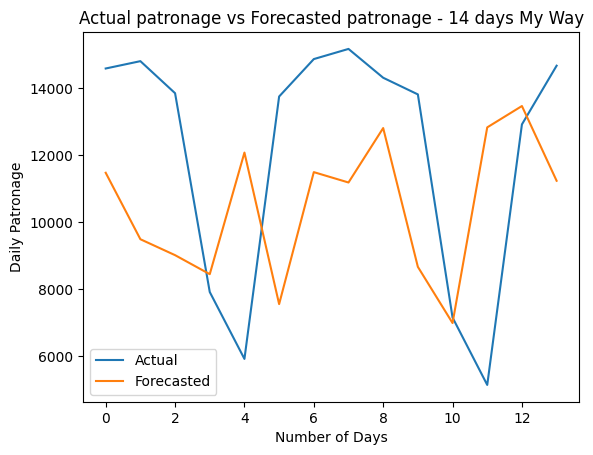

In [22]:
x = list(range(0,14))
plt.plot(x, actuals, label='Actual')
plt.plot(x, mean_values_forecasted, label='Forecasted')
plt.xlabel("Number of Days")
plt.ylabel("Daily Patronage")
plt.title('Actual patronage vs Forecasted patronage - 14 days My Way')
plt.legend()
plt.show()

# **Generating the forecast for "Paper Ticket" variable with 14 days duration**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           paper_ticket   No. Observations:                  578
Model:               SARIMAX(7, 0, 5)   Log Likelihood               -3809.988
Date:                Sun, 14 Jan 2024   AIC                           7645.977
Time:                        06:53:29   BIC                           7702.493
Sample:                             0   HQIC                          7668.026
                                - 578                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0794      0.307      0.258      0.796      -0.523       0.681
ar.L2          0.1736      0.154      1.126      0.260      -0.129       0.476
ar.L3          0.3435      0.137      2.506      0.0

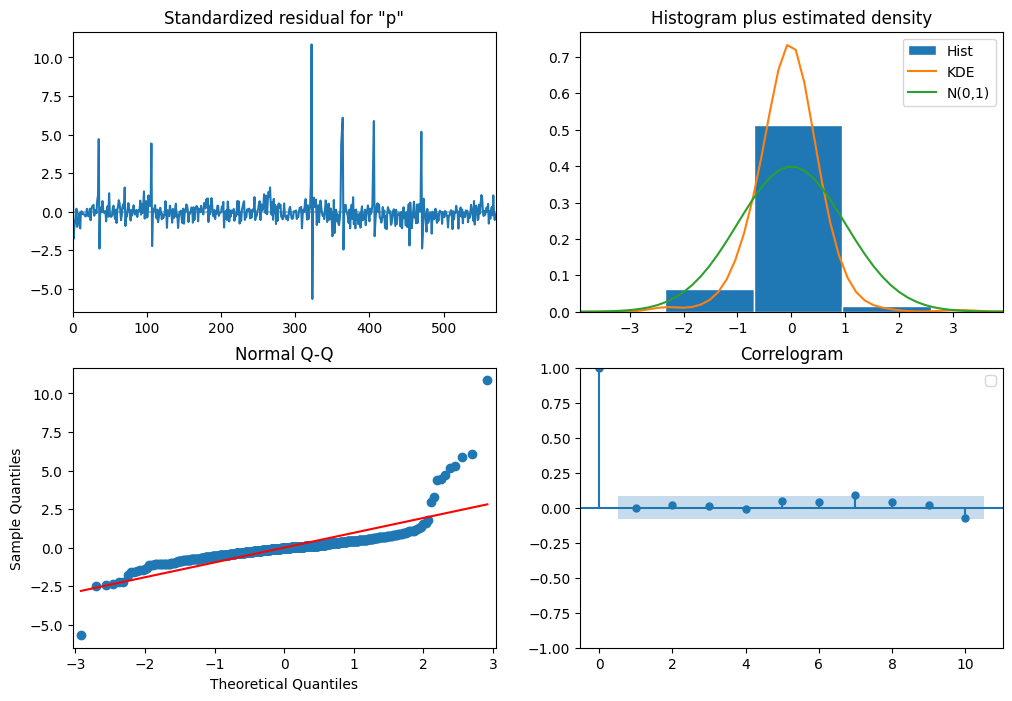

In [23]:
#training set
filtered_dataframe3=df[df.date>='2022-01-01']
filtered_dataframe2=filtered_dataframe3[filtered_dataframe3.date<='2023-08-01']

order = (7, 0, 5)  # Non-seasonal (p, d, q) order
seasonal_order = (0, 1, 0, 52)  # Seasonal (P, D, Q, s) order


model = sm.tsa.SARIMAX(filtered_dataframe2['paper_ticket'], order=order,enforce_stationarity=False)
results = model.fit()


print(results.summary())
results.plot_diagnostics(figsize=(12, 8))
plt.legend()
plt.show()

In [24]:
steps_to_forecast_future = 14  # Number of steps to forecast
forecast = results.get_forecast(steps=steps_to_forecast_future)
mean_values_forecasted = forecast.predicted_mean
confidence_interval = forecast.conf_int()
confidence_interval

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,lower paper_ticket,upper paper_ticket
578,7.514592,782.972977
579,-22.640682,833.974641
580,70.032481,945.463099
581,68.310818,943.747344
582,-11.622603,864.136302
583,24.439773,901.054493
584,76.994574,953.848970
585,9.734893,887.882393
586,-17.943708,861.192361
587,61.043616,940.418234


# **Evaluating the performance of the model for "Paper Ticket" forecast with 14 days duration**

In [25]:
actuals =list(filtered_dataframe1.paper_ticket[filtered_dataframe1.date>'2023-08-01'])
mean_values_forecasted=list(mean_values_forecasted)

print('RMSE value is:', sqrt(mean_squared_error(actuals, mean_values_forecasted)))
print('MAE value is:', (mean_absolute_error(actuals, mean_values_forecasted)))
print('MAPE value is:', (mean_absolute_percentage_error(actuals, mean_values_forecasted)))
print('MSE value is:', (mean_squared_error(actuals, mean_values_forecasted)))

RMSE value is: 81.35328918402874
MAE value is: 62.60691463571128
MAPE value is: 0.1475514616639746
MSE value is: 6618.357661060209


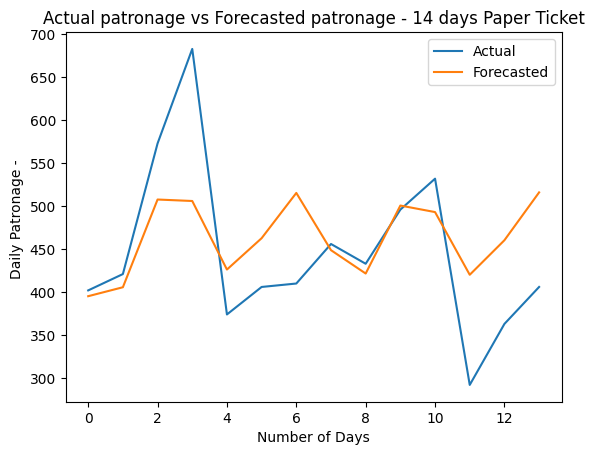

In [26]:
x = list(range(0,14))
plt.plot(x, actuals, label='Actual')
plt.plot(x, mean_values_forecasted, label='Forecasted')
plt.xlabel("Number of Days")
plt.ylabel("Daily Patronage - ")
plt.title('Actual patronage vs Forecasted patronage - 14 days Paper Ticket')
plt.legend()
plt.show()

# **Adding the Forecast for "My Way" and "Paper ticket" together for the "Total" forecast for 14 days duration**

In [27]:
#storing the predctions in a list
list_of_predictions_14days_paperticket=mean_values_forecasted

#getting the total ticket value by summing myway and paper_ticket
predictions_14=[]
for i in range (0,14):
    predictions_14.append(list_of_predictions_14days_paperticket[i]+list_of_predictions_14days_myway[i])

# **Evaluating the performance of the model for "Total" forecast with 14 days duration**

In [28]:
actuals =list(filtered_dataframe1.total[filtered_dataframe1.date>'2023-08-01'])
mean_values_forecasted=predictions_14


print('RMSE value is:', sqrt(mean_squared_error(actuals, mean_values_forecasted)))
print('MAE value is:', (mean_absolute_error(actuals, mean_values_forecasted)))
print('MAPE value is:', (mean_absolute_percentage_error(actuals, mean_values_forecasted)))
print('MSE value is:', (mean_squared_error(actuals, mean_values_forecasted)))

RMSE value is: 4360.799281809378
MAE value is: 3709.697337024828
MAPE value is: 0.35853431335730895
MSE value is: 19016570.376229186


In [29]:
#P10, P50 and P90 predictions and the error in the prediction

Forecasted_Percentile10 = np.percentile(predictions_14,10)
Actual_Percentile10 = np.percentile(actuals,10)
print('P10 Error % :',mean_absolute_percentage_error([Forecasted_Percentile10], [Actual_Percentile10]))

Forecasted_Percentile50 = np.percentile(predictions_14,50)
Actual_Percentile50 = np.percentile(actuals,50)
print('P50 Error % :',mean_absolute_percentage_error([Forecasted_Percentile50], [Actual_Percentile50]))

Forecasted_Percentile90 = np.percentile(predictions_14,90)
Actual_Percentile90 = np.percentile(actuals,90)
print('P90 Error % :',mean_absolute_percentage_error([Forecasted_Percentile90], [Actual_Percentile90]))

P10 Error % : 0.19111061540766905
P50 Error % : 0.22846022654735007
P90 Error % : 0.15231711409485837


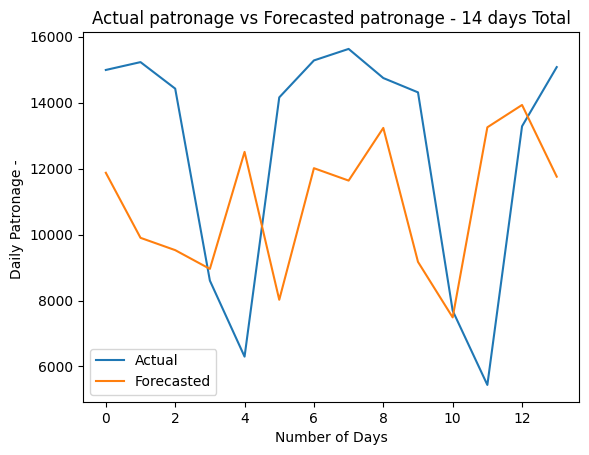

In [30]:
x = list(range(0,14))
plt.plot(x, actuals, label='Actual')
plt.plot(x, mean_values_forecasted, label='Forecasted')
plt.xlabel("Number of Days")
plt.ylabel("Daily Patronage - ")
plt.title('Actual patronage vs Forecasted patronage - 14 days Total')
plt.legend()
plt.show()

# **Generating the forecast for "My Way" variable with 7 days duration**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                      
Dep. Variable:                               myway   No. Observations:                  434
Model:             SARIMAX(5, 0, 2)x(1, 1, [], 52)   Log Likelihood               -3119.879
Date:                             Sun, 14 Jan 2024   AIC                           6257.757
Time:                                     06:54:47   BIC                           6291.812
Sample:                                          0   HQIC                          6271.348
                                             - 434                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3079      1.648     -0.187      0.852      -3.538       2.922
ar.L2          0.1379      

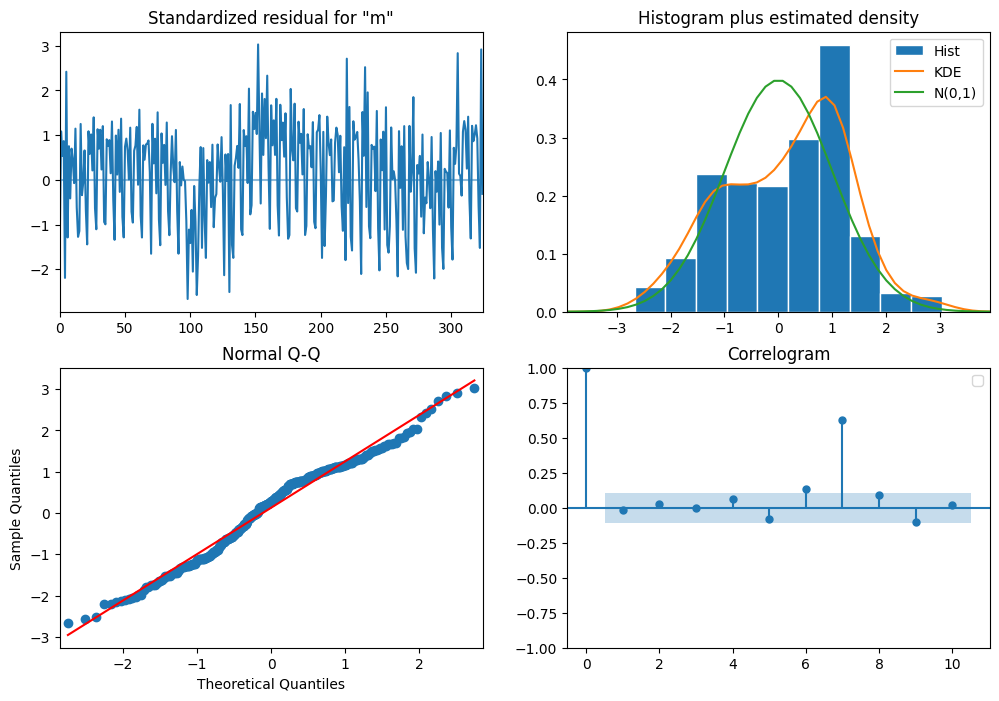

In [31]:
#training set
filtered_dataframe2=filtered_dataframe1[filtered_dataframe1.date<='2023-08-08']

order = (5, 0, 2)  # Non-seasonal (p, d, q) order
seasonal_order = (1, 1, 0, 52)  # Seasonal (P, D, Q, s) order


model = sm.tsa.SARIMAX(filtered_dataframe2['myway'], order=order, seasonal_order=seasonal_order ,enforce_stationarity=False)
results = model.fit()


print(results.summary())
results.plot_diagnostics(figsize=(12, 8))
plt.legend()
plt.show()


In [32]:
steps_to_forecast_future = 7  # Number of steps to forecast
forecast = results.get_forecast(steps=steps_to_forecast_future)
mean_values_forecasted = forecast.predicted_mean
confidence_interval = forecast.conf_int()
confidence_interval

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,lower myway,upper myway
434,4509.746897,16672.756651
435,5859.736993,19564.060172
436,1658.709333,15365.090629
437,31.873319,13756.457281
438,5812.217773,19564.199269
439,6616.339552,20380.146654
440,4234.609714,17999.764010


from matplotlib import pyplot as plt
_df_33['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['lower myway'].plot(kind='hist', bins=20, title='lower myway')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['upper myway'].plot(kind='hist', bins=20, title='upper myway')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='index', y='lower myway', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='lower myway', y='upper myway', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['lower myway']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('lower myway')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['upper myway']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('upper myway')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_41['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['lower myway'].plot(kind='line', figsize=(8, 4), title='lower myway')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['upper myway'].plot(kind='line', figsize=(8, 4), title='upper myway')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Evaluating the performance of the model for "My Way" forecast with 7 days duration**

In [33]:
actuals =list(filtered_dataframe1.myway[filtered_dataframe1.date>'2023-08-08'])
mean_values_forecasted=list(mean_values_forecasted)
#storing the predctions in a list
list_of_predictions_7days_myway= mean_values_forecasted

print('RMSE value is:', sqrt(mean_squared_error(actuals, mean_values_forecasted)))
print('MAE value is:', (mean_absolute_error(actuals, mean_values_forecasted)))
print('MAPE value is:', (mean_absolute_percentage_error(actuals, mean_values_forecasted)))
print('MSE value is:', (mean_squared_error(actuals, mean_values_forecasted)))

RMSE value is: 4167.384565681846
MAE value is: 3346.2927320490744
MAPE value is: 0.36943385183373767
MSE value is: 17367094.118283268


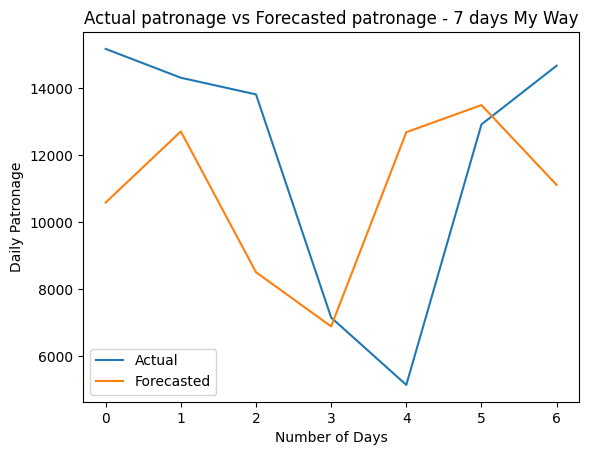

In [34]:
x = list(range(0,7))
plt.plot(x, actuals, label='Actual')
plt.plot(x, mean_values_forecasted, label='Forecasted')
plt.xlabel("Number of Days")
plt.ylabel("Daily Patronage")
plt.title('Actual patronage vs Forecasted patronage - 7 days My Way')
plt.legend()
plt.show()

# **Generating the forecast for "Paper Ticket" variable with 7 days duration**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           paper_ticket   No. Observations:                  585
Model:               SARIMAX(7, 0, 5)   Log Likelihood               -3853.649
Date:                Sun, 14 Jan 2024   AIC                           7733.298
Time:                        06:54:51   BIC                           7789.972
Sample:                             0   HQIC                          7755.397
                                - 585                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0790      0.293      0.269      0.788      -0.495       0.653
ar.L2          0.1771      0.146      1.213      0.225      -0.109       0.463
ar.L3          0.3429      0.129      2.653      0.0

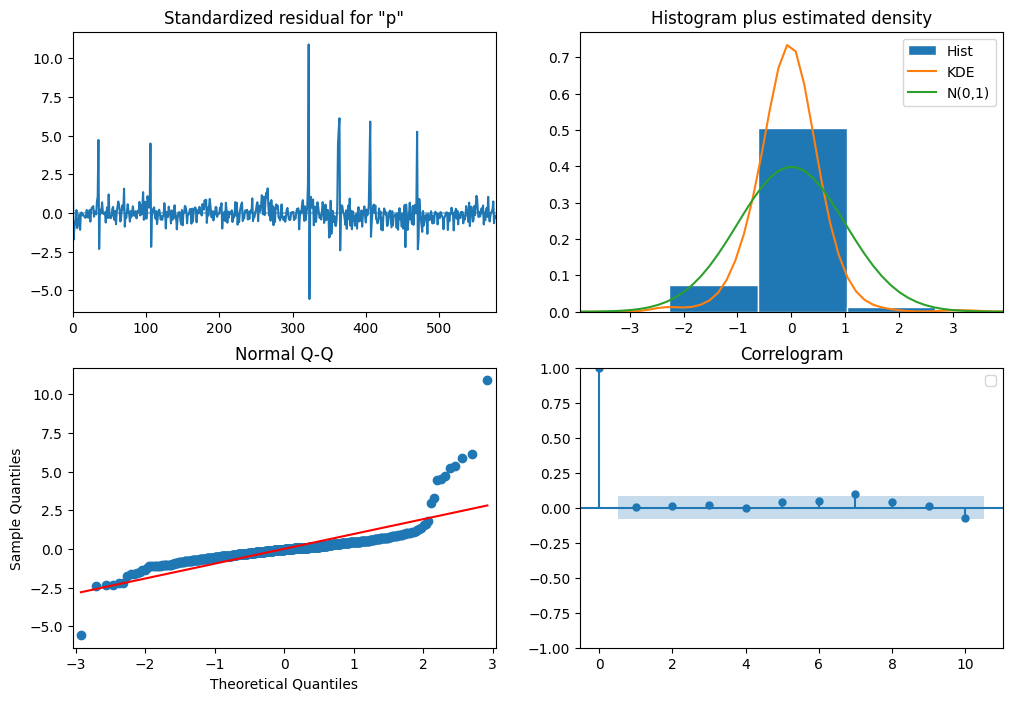

In [35]:
filtered_dataframe3=df[df.date>='2022-01-01']
filtered_dataframe2=filtered_dataframe3[filtered_dataframe3.date<='2023-08-08']

order = (7, 0, 5)  # Non-seasonal (p, d, q) order
seasonal_order = (0, 1, 0, 52)  # Seasonal (P, D, Q, s) order


model = sm.tsa.SARIMAX(filtered_dataframe2['paper_ticket'], order=order,enforce_stationarity=False)
results = model.fit()


print(results.summary())
results.plot_diagnostics(figsize=(12, 8))
plt.legend()
plt.show()


In [36]:
steps_to_forecast_future = 7  # Number of steps to forecast
forecast = results.get_forecast(steps=steps_to_forecast_future)
mean_values_forecasted = forecast.predicted_mean
confidence_interval = forecast.conf_int()
confidence_interval

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,lower paper_ticket,upper paper_ticket
585,20.566626,792.161963
586,-20.745885,827.852525
587,78.663097,946.499639
588,80.493839,948.362275
589,-9.802705,858.574461
590,27.392835,896.572811
591,85.558878,954.983927


from matplotlib import pyplot as plt
_df_44['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45['lower paper_ticket'].plot(kind='hist', bins=20, title='lower paper_ticket')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['upper paper_ticket'].plot(kind='hist', bins=20, title='upper paper_ticket')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47.plot(kind='scatter', x='index', y='lower paper_ticket', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48.plot(kind='scatter', x='lower paper_ticket', y='upper paper_ticket', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['lower paper_ticket']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_49.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('lower paper_ticket')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['upper paper_ticket']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_50.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('upper paper_ticket')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_51.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_52['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_53['lower paper_ticket'].plot(kind='line', figsize=(8, 4), title='lower paper_ticket')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_54['upper paper_ticket'].plot(kind='line', figsize=(8, 4), title='upper paper_ticket')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Evaluating the performance of the model for "Paper Ticket" forecast with 7 days duration**

In [37]:
actuals =list(filtered_dataframe1.paper_ticket[filtered_dataframe1.date>'2023-08-08'])
mean_values_forecasted=list(mean_values_forecasted)


print('RMSE value is:', sqrt(mean_squared_error(actuals, mean_values_forecasted)))
print('MAE value is:', (mean_absolute_error(actuals, mean_values_forecasted)))
print('MAPE value is:', (mean_absolute_percentage_error(actuals, mean_values_forecasted)))
print('MSE value is:', (mean_squared_error(actuals, mean_values_forecasted)))

RMSE value is: 79.54881577553834
MAE value is: 65.55368584542906
MAPE value is: 0.17868992466084932
MSE value is: 6328.014091290538


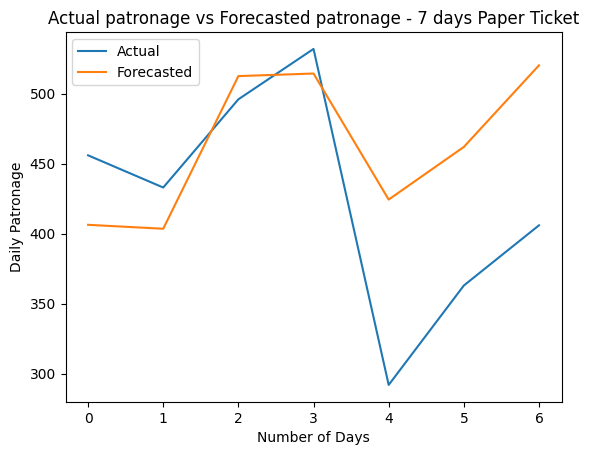

In [38]:
x = list(range(0,7))
plt.plot(x, actuals, label='Actual')
plt.plot(x, mean_values_forecasted, label='Forecasted')
plt.xlabel("Number of Days")
plt.ylabel("Daily Patronage")
plt.title('Actual patronage vs Forecasted patronage - 7 days Paper Ticket')
plt.legend()
plt.show()

# **Adding the Forecast for "My Way" and "Paper ticket" together for the "Total" forecast for 7 days duration**

In [39]:
#storing the predctions in a list
predictions_7_paper_ticket=mean_values_forecasted

#getting the total ticket value by summing myway and paper_ticket
predictions_7=[]
for i in range (0,7):
    predictions_7.append(predictions_7_paper_ticket[i]+list_of_predictions_7days_myway[i])

# **Evaluating the performance of the model for "Total" forecast with 7 days duration**

In [40]:
actuals =list(filtered_dataframe1.total[filtered_dataframe1.date>'2023-08-08'])
mean_values_forecasted=predictions_7

print('RMSE value is:', sqrt(mean_squared_error(actuals, mean_values_forecasted)))
print('MAE value is:', (mean_absolute_error(actuals, mean_values_forecasted)))
print('MAPE value is:', (mean_absolute_percentage_error(actuals, mean_values_forecasted)))
print('MSE value is:', (mean_squared_error(actuals, mean_values_forecasted)))

RMSE value is: 4196.844845447317
MAE value is: 3374.4599119848185
MAPE value is: 0.3574639655589501
MSE value is: 17613506.65675772


# **Final objective metioned in the requirement**

In [41]:
#P10, P50 and P90 predictions and the error in the prediction

Forecasted_Percentile10 = np.percentile(predictions_7,10)
Actual_Percentile10 = np.percentile(actuals,10)
print('P10 Error % :',mean_absolute_percentage_error([Forecasted_Percentile10], [Actual_Percentile10]))

Forecasted_Percentile50 = np.percentile(predictions_7,50)
Actual_Percentile50 = np.percentile(actuals,50)
print('P50 Error % :',mean_absolute_percentage_error([Forecasted_Percentile50], [Actual_Percentile50]))

Forecasted_Percentile90 = np.percentile(predictions_7,90)
Actual_Percentile90 = np.percentile(actuals,90)
print('P90 Error % :',mean_absolute_percentage_error([Forecasted_Percentile90], [Actual_Percentile90]))

P10 Error % : 0.18936527377440998
P50 Error % : 0.22982181117974732
P90 Error % : 0.13714330699909877


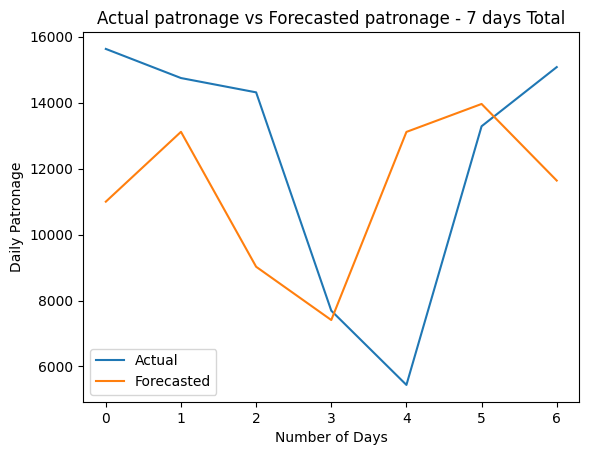

In [42]:
x = list(range(0,7))
plt.plot(x, actuals, label='Actual')
plt.plot(x, mean_values_forecasted, label='Forecasted')
plt.xlabel("Number of Days")
plt.ylabel("Daily Patronage")
plt.title('Actual patronage vs Forecasted patronage - 7 days Total')
plt.legend()
plt.show()